<a href="https://colab.research.google.com/github/businsweetie/deep_learning/blob/main/Task_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт бибилиотек и функции

In [1]:
# импорт нужных бибилиотек
import os
import cv2
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Загрузка набора данных

In [2]:
# получение токена для загрузки набора данных с сайта kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dashkabugashka","key":"120cb24fa13253988e528a5054fa0b13"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Dec 19 14:53 kaggle.json


In [4]:
# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops

100% 2.36G/2.37G [01:14<00:00, 38.5MB/s]
100% 2.37G/2.37G [01:14<00:00, 33.9MB/s]


## Чтение данных

In [ ]:
# разархивирование данных
!unzip "/content/weed-detection-in-soybean-crops.zip" -d "/content/weed_detection"

In [9]:
labels = ["soil", "grass"]

In [10]:
X  =[]
Y = []
image_size = (224, 224)

for i in labels:
    Datasetspath = "/content/weed_detection/dataset/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(len(fileRead))

    for file in fileRead:
        image = cv2.imread(file)
        img = cv2.resize(image, image_size)
        X.append(img)
        Y.append(i)
X = np.array(X)
Y = np.array(Y)

/content/weed_detection/dataset/dataset/soil/
3249
/content/weed_detection/dataset/dataset/grass/
3520


In [11]:
# конвертируем названия классов в метки
lb = LabelEncoder()
y = lb.fit_transform(Y)
class_names = lb.classes_
class_names

array(['grass', 'soil'], dtype='<U5')

# Деление на выборки

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

print(f"Размер тренировочной выборки: {X_train.shape[0]}")
print(f"Размер валидационной выборки: {X_val.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер тренировочной выборки: 4332
Размер валидационной выборки: 1083
Размер тестовой выборки: 1354


# Загрузка модели

In [16]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot

In [17]:
model = VGG16()

553467096/553467096 [==============================] - 15s 0us/step


# Фильтры сверточной нейронной сети

In [18]:
for layer in model.layers:

    if 'conv' not in layer.name:
        continue
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [ ]:
# retrieve weights from the second hidden layer
filters, bias = model.layers[1].get_weights()

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

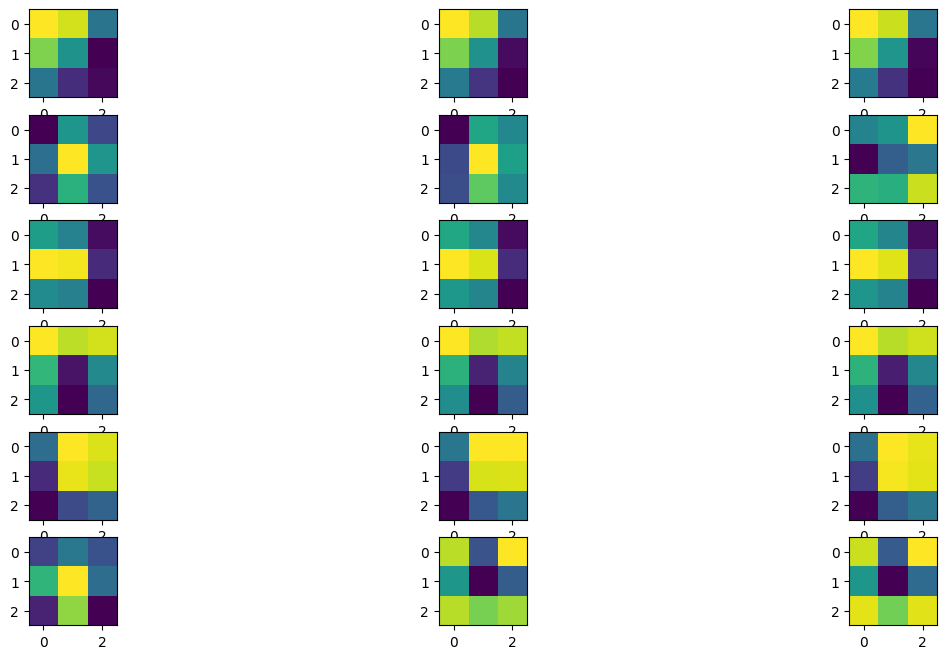

In [ ]:
n_filters = 6
ix = 1
fig = pyplot.figure(figsize=(15, 8))
for i in range(n_filters):
    # get the filters
    f = filters[:, :, :, i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters, 3, ix)
        pyplot.imshow(f[:, :, j])
        ix+=1
#plot the filters
pyplot.show()

In [ ]:
image_class_grass = load_img("/content/weed_detection/dataset/dataset/grass/1.tif" , target_size=(224, 224))
image_class_soil = load_img("/content/weed_detection/dataset/dataset/soil/1.tif" , target_size=(224, 224))

# convert the image to an array
image_class_grass = img_to_array(image_class_grass)
image_class_soil = img_to_array(image_class_soil)

# expand dimensions so that it represents a single 'sample'
image_class_grass = expand_dims(image_class_grass, axis=0)
image_class_soil = expand_dims(image_class_soil, axis=0)

In [ ]:
image_class_grass = preprocess_input(image_class_grass)
image_class_soil = preprocess_input(image_class_soil)

In [ ]:
blocks = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in blocks]

model = Model(inputs=model.inputs, outputs=outputs)

# Промежуточные активации

In [ ]:
feature_map_grass = model.predict(image_class_grass)
feature_map_soil = model.predict(image_class_soil)

1/1 [==============================] - 1s 566ms/step


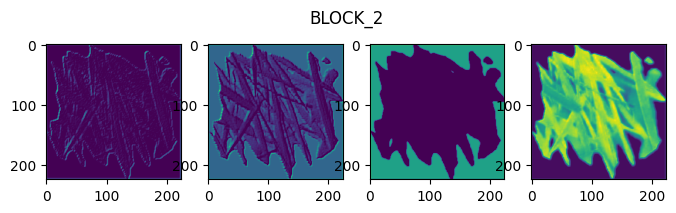

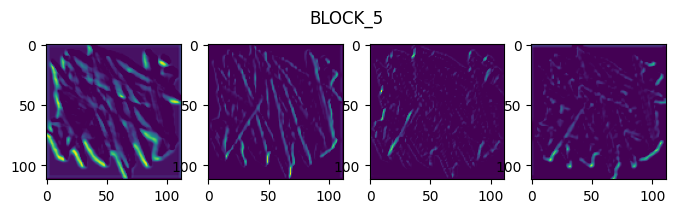

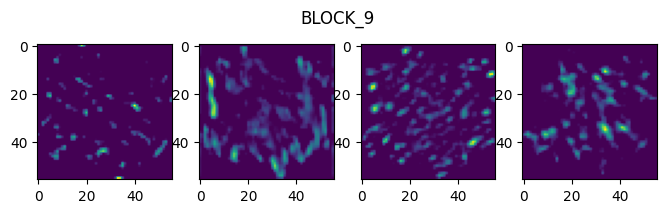

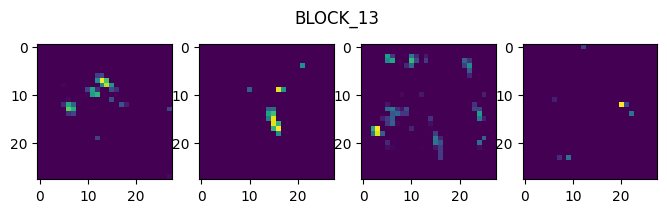

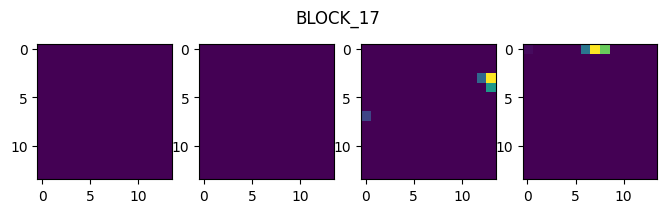

In [ ]:
for i,fmap in zip(blocks, feature_map_grass):
    fig = pyplot.figure(figsize=(8, 5))
    fig.suptitle("BLOCK_{}".format(i), y=.7)
    for i in range(1, 5):
        pyplot.subplot(1, 4, i)
        pyplot.imshow(fmap[0, :, :, i-1])

pyplot.show()

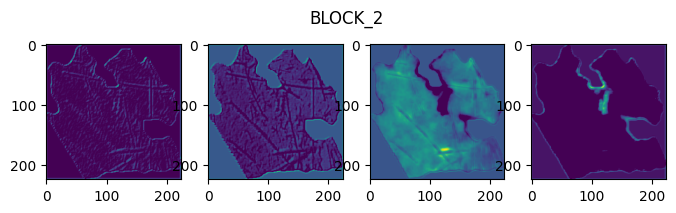

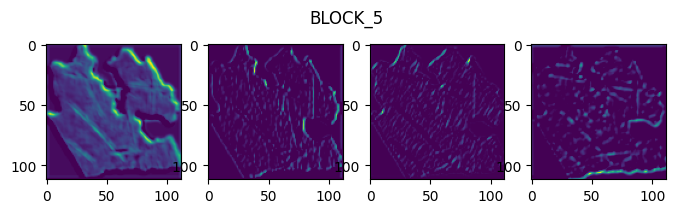

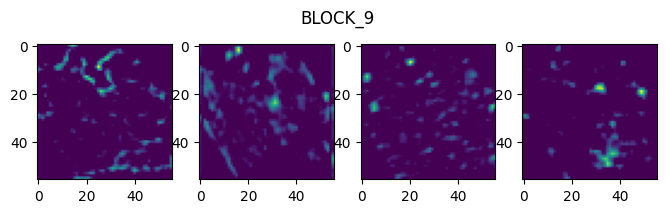

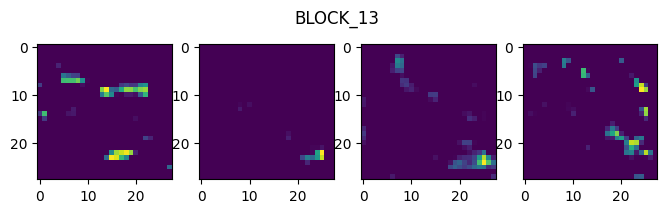

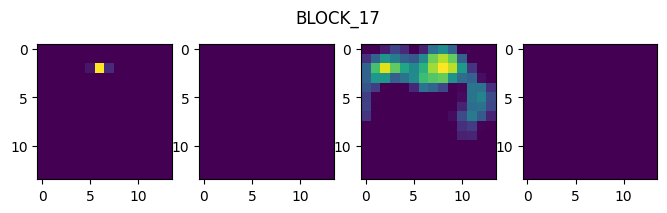

In [ ]:
for i,fmap in zip(blocks, feature_map_soil):
    fig = pyplot.figure(figsize=(8, 5))
    fig.suptitle("BLOCK_{}".format(i), y=.7)
    for i in range(1, 5):
        pyplot.subplot(1, 4, i)
        pyplot.imshow(fmap[0, :, :, i-1])

pyplot.show()

# Shap

In [19]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.8 MB/s eta 0:00:00


In [20]:
import shap

In [43]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL/image_classificaion.h5')

In [44]:
masker = shap.maskers.Image("inpaint_telea", X_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=class_names)

explainer

In [45]:
shap_values = explainer(X_test[:1], outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [02:39, 159.10s/it]              


(1, 224, 224, 3, 2)

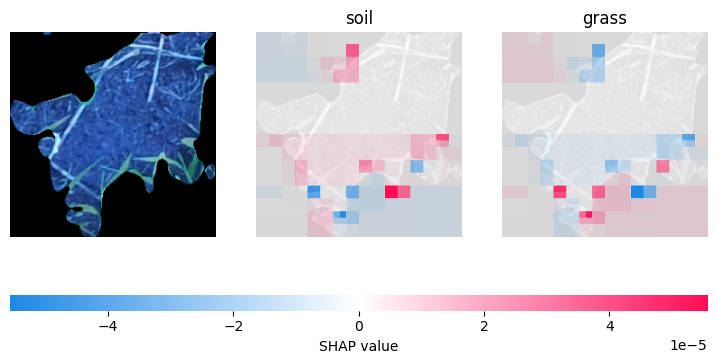

In [46]:
shap.image_plot(shap_values)

In [47]:
shap_values = explainer(X_test[1:2], outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [02:32, 152.87s/it]              


(1, 224, 224, 3, 2)

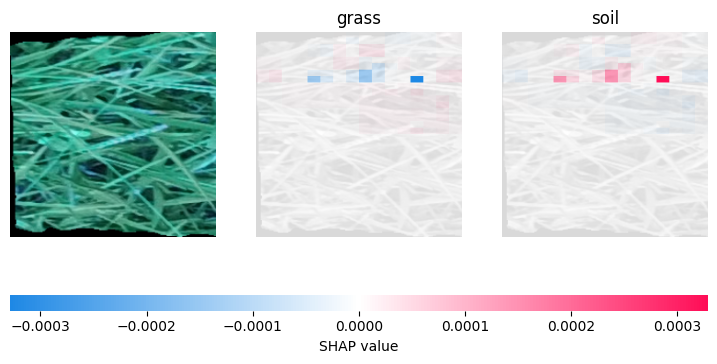

In [48]:
shap.image_plot(shap_values)